# Plot figure 1

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the data

In [2]:
os.chdir('..')
home_dir = os.getcwd()
downloaded_data = r"downloaded-data"


In [3]:
with open(f"{downloaded_data}\continents_data_18-23_ai.json", "r") as f:
    data = json.load(f)
# data


#### Edit the obtained data into desired shape to create a DataFrame

In [4]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [5]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [6]:
# xtract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

## Plot the results

#### Data preparation and filtering

In [7]:
# labels for graph legend
labels_dic = {0:"Africa",
            1:"Asia",
            2:"Australia",
            3:"North America",
            4:"Oceania",
            5:"South America",
            6:"Antarctica",
            7:"Europe",
            }

# creating pandas series from labels_dic and append it to the dataframe
ser_labels = pd.Series(labels_dic, name="continent" )

df_labels = pd.DataFrame({"continent": ser_labels, "id": range(len(ser_labels))})
# print(df_labels)

df = df.merge(df_labels, how="left", left_on="feature", right_on="id")
# df

In [8]:
# get the number of AI Microsoft (source=microsoft/BuildingFootprints) / manually mapped (remainder) buildings for every year
grouped = df.groupby(["source", "year"])["value"].sum()
# grouped


In [9]:
# merge the DataFrame with groupBy DataFrame and compute the percentage
merged_data = df.merge(grouped, on=["source", 'year'], how='left', )
merged_data = merged_data.rename(columns={"value_x":"num_of_blds", "value_y":"total_blds"})
merged_data["percentage"] = (merged_data["num_of_blds"] / merged_data["total_blds"]) * 100
# merged_data.head(10)


In [10]:
# percentage verification
merged_data.groupby(["source", "year"])["percentage"].sum()


source                               year
remainder                            2018    100.0
                                     2019    100.0
                                     2020    100.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
source=microsoft/BuildingFootprints  2018      0.0
                                     2019      0.0
                                     2020    100.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
Name: percentage, dtype: float64

In [11]:
# create the dataframe by the source
df_ai = merged_data.loc[(df["source"] == "source=microsoft/BuildingFootprints") , :] # buiildings used from Microsoft AI
df_rem = merged_data.loc[(df["source"] == "remainder"),:] # remainder = manually mapped buildings
# df_ai.head()


#### Plots

In [12]:
def fill_under_lines(*argv, alpha=.2, **kwargs):
    for ax in argv:
        if ax is None:
            ax = plt.gca()
        for line in ax.lines:
            x, y = line.get_xydata().T
            ax.fill_between(x, 0, y, color=line.get_color(), alpha=alpha, **kwargs)

Text(0, 0.5, 'Number of buildings')

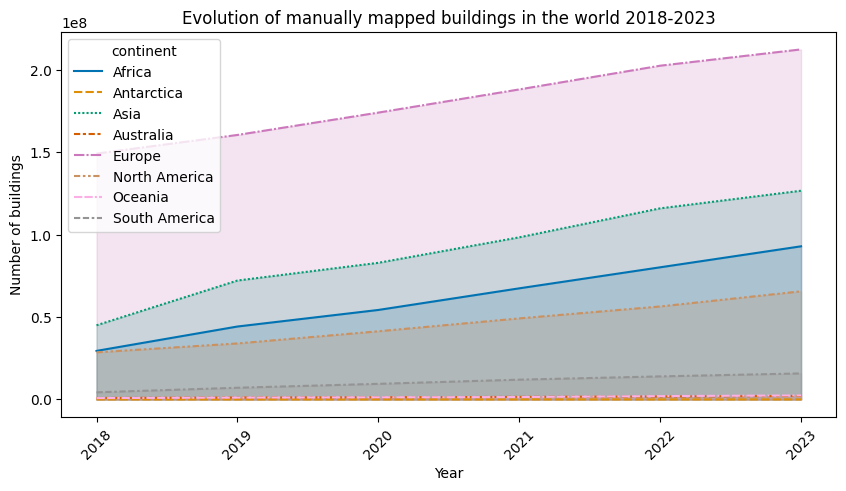

In [13]:
# without dictionary labels

plt.figure(figsize=(10, 5))
plt.title("Evolution of manually mapped buildings in the world 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='continent', data=df_rem,
             palette='colorblind',  style='continent',
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Year")
plt.ylabel("Number of buildings")


Text(0, 0.5, 'Number of buildings')

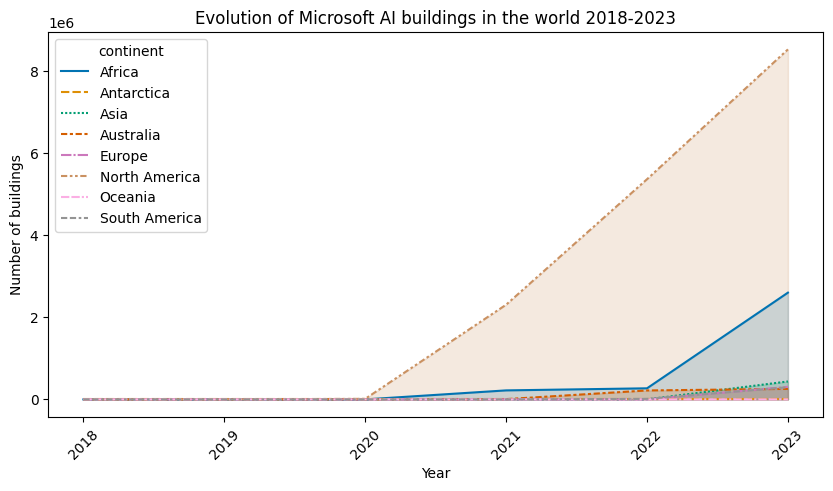

In [14]:
# without dictionary labels

plt.figure(figsize=(10, 5))
plt.title("Evolution of Microsoft AI buildings in the world 2018-2023")

# plot the data
ax = sns.lineplot(x='year', y='num_of_blds', hue='continent', data=df_ai,
                  palette='colorblind',  style='continent',
                  )
# log y axis
# plt.yscale("log")

# rotate x labels
plt.xticks(rotation=45)
# plt.ylim(top=105)

# fill the area under lines
fill_under_lines(ax)

# set x and y axis labels
plt.xlabel("Year")
plt.ylabel("Number of buildings")


In [15]:
# how the DataFrame looks like – manually mapped buildings
df_rem.head()



,feature,source,timestamp,num_of_blds,year,continent,id,total_blds,percentage
0,0,remainder,2018-01-01T00:00:00Z,29449360.0,2018,Africa,0,258151878.0,11.407765
1,0,remainder,2019-01-01T00:00:00Z,44240256.0,2019,Africa,0,320167900.0,13.817830
2,0,remainder,2020-01-01T00:00:00Z,54298403.0,2020,Africa,0,364680591.0,14.889304
3,0,remainder,2021-01-01T00:00:00Z,67423672.0,2021,Africa,0,418092103.0,16.126512
4,0,remainder,2022-01-01T00:00:00Z,80187816.0,2022,Africa,0,472865820.0,16.957837


In [16]:
# how the DataFrames look like – AI Microsoft buildings
df_ai.head()

,feature,source,timestamp,num_of_blds,year,continent,id,total_blds,percentage
6,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,Africa,0,0.0,NaN
7,0,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,Africa,0,0.0,NaN
8,0,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,Africa,0,13935.0,0.000000
9,0,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,219212.0,2021,Africa,0,2530556.0,8.662602
10,0,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,269849.0,2022,Africa,0,5859157.0,4.605594


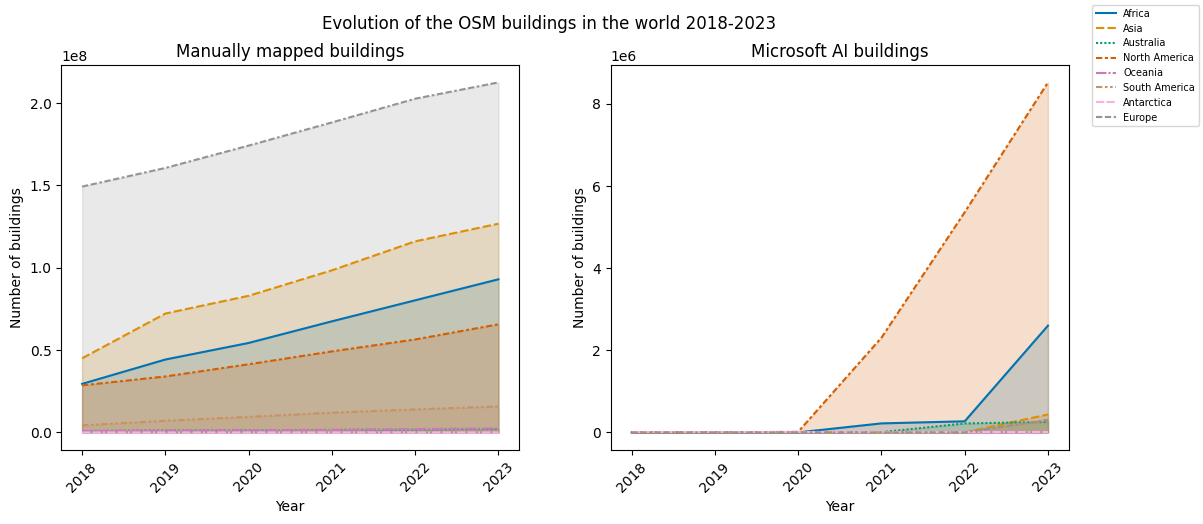

In [17]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))
fig.suptitle("Evolution of the OSM buildings in the world 2018-2023")

# create a Seaborn plot on the first subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_rem, ax=ax1,
             palette='colorblind', style='feature',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())

# create another Seaborn plot on the second subplot
sns.lineplot(x='year', y='num_of_blds', hue='feature', data=df_ai, ax=ax2,
             palette='colorblind', style='feature',
             hue_order=labels_dic.keys(),
             style_order=labels_dic.keys())

# set the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
ax2.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=7)
ax1.legend().remove()
ax2.legend().remove()

# ax1.set_yscale("log")
# ax2.set_yscale("log")

# set titles for each subplot
ax1.set_title("Manually mapped buildings")
ax2.set_title("Microsoft AI buildings")

# set the y axis limit
# ax1.set_ylim(top=105, bottom=-5)
# ax2.set_ylim(top=105, bottom=-5)

# set the y axis label
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of buildings")

# set the x axis label
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of buildings")

# fill the area under lines
fill_under_lines(ax1,ax2)

# rotate x-axis labels for both subplots
for ax in [ax1, ax2]:
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', labelrotation=45)

fig.legend(handles, [labels_dic[key] for key in labels_dic.keys()], fontsize=7)

plt.show()
